In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from math import pi

%matplotlib inline 

In [2]:
# Clean and standardize datasets

df_2015 = pd.read_csv('archive/2015.csv')
df_2015.drop(columns=['Standard Error'], inplace=True)
df_2015.rename(columns={
    'Happiness Rank' : 'Rank',
    'Happiness Score' : 'Score',
    'Economy (GDP per Capita)' : 'Economy',
    'Health (Life Expectancy)' : 'Health',
    'Trust (Government Corruption)' : 'Trust'}, inplace=True)
df_2015['Year'] = 2015

df_2016 = pd.read_csv('archive/2016.csv')
df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
df_2016.rename(columns={
    'Happiness Rank' : 'Rank',
    'Happiness Score' : 'Score',
    'Economy (GDP per Capita)' : 'Economy',
    'Health (Life Expectancy)' : 'Health',
    'Trust (Government Corruption)' : 'Trust'}, inplace=True)
df_2016['Year'] = 2016

df_2017 = pd.read_csv('archive/2017.csv')
df_2017.drop(columns=['Whisker.high', 'Whisker.low'], inplace=True)
df_2017.rename(columns={
    'Happiness.Rank' : 'Rank',
    'Happiness.Score' : 'Score',
    'Economy..GDP.per.Capita.' : 'Economy',
    'Health..Life.Expectancy.' : 'Health',
    'Trust..Government.Corruption.' : 'Trust'}, inplace=True)
df_2017['Year'] = 2017

df_2018 = pd.read_csv('archive/2018.csv')
# df_2018.drop(columns=[])
df_2018.rename(columns={
    'Overall rank' : 'Rank',
    'Country or region' : 'Country',
    'GDP per capita' : 'Economy',
    'Healthy life expectancy' : 'Health',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust'}, inplace=True)
df_2018['Year'] = 2019

df_2019 = pd.read_csv('archive/2019.csv')
# df_2018.drop(columns=[])
df_2019.rename(columns={
    'Overall rank' : 'Rank',
    'Country or region' : 'Country',
    'GDP per capita' : 'Economy',
    'Healthy life expectancy' : 'Health',
    'Freedom to make life choices' : 'Freedom',
    'Perceptions of corruption' : 'Trust'}, inplace=True)
df_2019['Year'] = 2019

country_regions_df = df_2015[['Country', 'Region']] # dataframe with all the countries and their respective regions
years = list(range(2015,2020))

In [3]:
# Create a dataframe that cointains the ranks of each country for the years 2015-2019
country_ranks_df_2015 = df_2015[['Country', 'Rank']].sort_values(by=['Country'], ignore_index=True)
country_ranks_df_2016 = df_2016[['Country', 'Rank']].sort_values(by=['Country'], ignore_index=True)
country_ranks_df_2017 = df_2017[['Country', 'Rank']].sort_values(by=['Country'], ignore_index=True)
country_ranks_df_2018 = df_2018[['Country', 'Rank']].sort_values(by=['Country'], ignore_index=True)
country_ranks_df_2019 = df_2019[['Country', 'Rank']].sort_values(by=['Country'], ignore_index=True)

country_ranks_df_2015.rename(columns={'Rank' : '2015'}, inplace=True)
country_ranks_df_2016.rename(columns={'Rank' : '2016'}, inplace=True)
country_ranks_df_2017.rename(columns={'Rank' : '2017'}, inplace=True)
country_ranks_df_2018.rename(columns={'Rank' : '2018'}, inplace=True)
country_ranks_df_2019.rename(columns={'Rank' : '2019'}, inplace=True)

country_ranks_df = country_ranks_df_2015.merge(country_ranks_df_2016, on='Country') \
.merge(country_ranks_df_2017, on='Country') \
.merge(country_ranks_df_2018, on='Country') \
.merge(country_ranks_df_2019, on='Country')

country_ranks_df.set_index('Country', inplace=True)

# print(country_ranks_df.head())

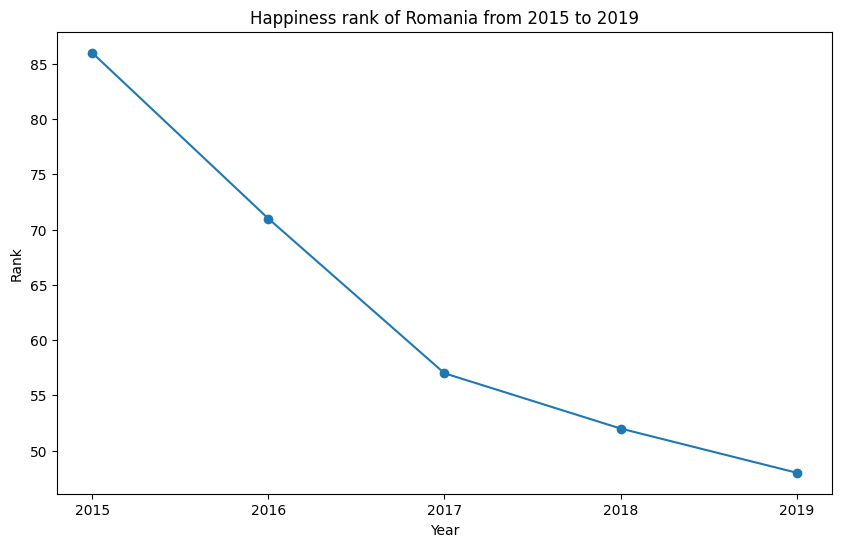

In [4]:
# The happiness evolution of Romania for the years 2015-2019

romania_happiness_df = country_ranks_df.loc['Romania']

romania_ranks = romania_happiness_df.to_list()

plt.figure(figsize=(10,6))
plt.title('Happiness rank of Romania from 2015 to 2019')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.plot(romania_happiness_df, marker='o')




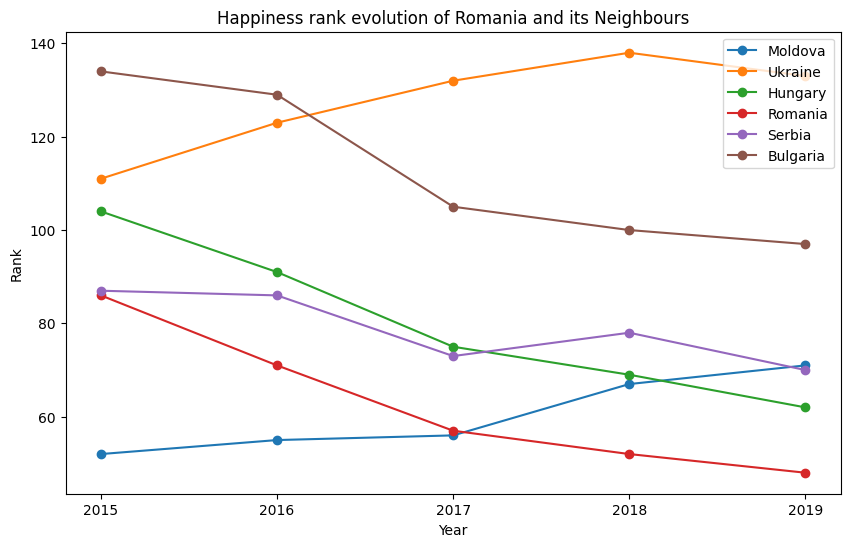

In [5]:
neighbours_list = ['Moldova', 'Ukraine', 'Hungary', 'Romania', 'Serbia', 'Bulgaria']

cee_countries_df = country_ranks_df.loc[neighbours_list]

plt.figure(figsize=(10,6))


for country in neighbours_list:
    plt.plot(country_ranks_df.loc[country], label=country, marker='o')
plt.title('Happiness rank evolution of Romania and its Neighbours')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend()
plt.show()

In [6]:
common_columns = ['Country', 'Rank', 'Score', 'Economy', 'Health', 'Freedom', 'Trust', 'Year']
df_2015_map = df_2015[common_columns]
df_2016_map = df_2016[common_columns]
df_2017_map = df_2017[common_columns]
df_2018_map = df_2018[common_columns]
df_2019_map = df_2019[common_columns]

df_all_years = pd.concat([df_2015_map, df_2016_map, df_2017_map, df_2018_map, df_2019_map], ignore_index=True)

fig = px.choropleth(
    df_all_years,
    locations="Country",
    locationmode="country names",
    color="Score",
    hover_name="Country",
    hover_data={'Score': True, 'Economy': True, 'Health': True, 'Freedom': True, 'Trust': True},
    color_continuous_scale="Viridis",
    animation_frame="Year",
    title="World Happiness Score Over Time"
)
fig.show()

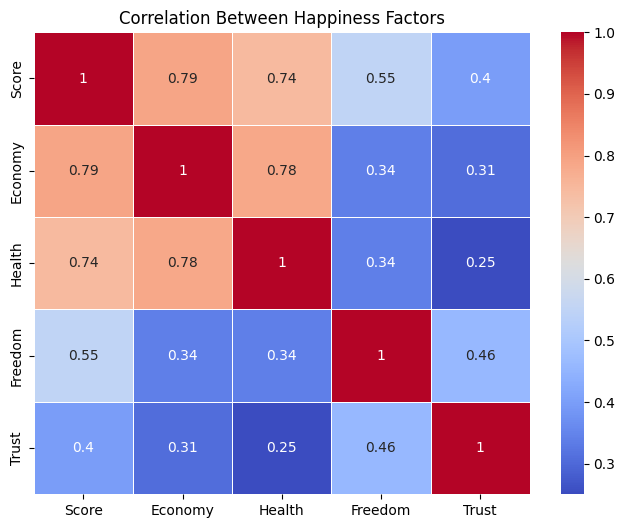

In [7]:
# Correlation matrix
correlation_matrix = df_all_years[['Score', 'Economy', 'Health', 'Freedom', 'Trust']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Happiness Factors")
plt.show()

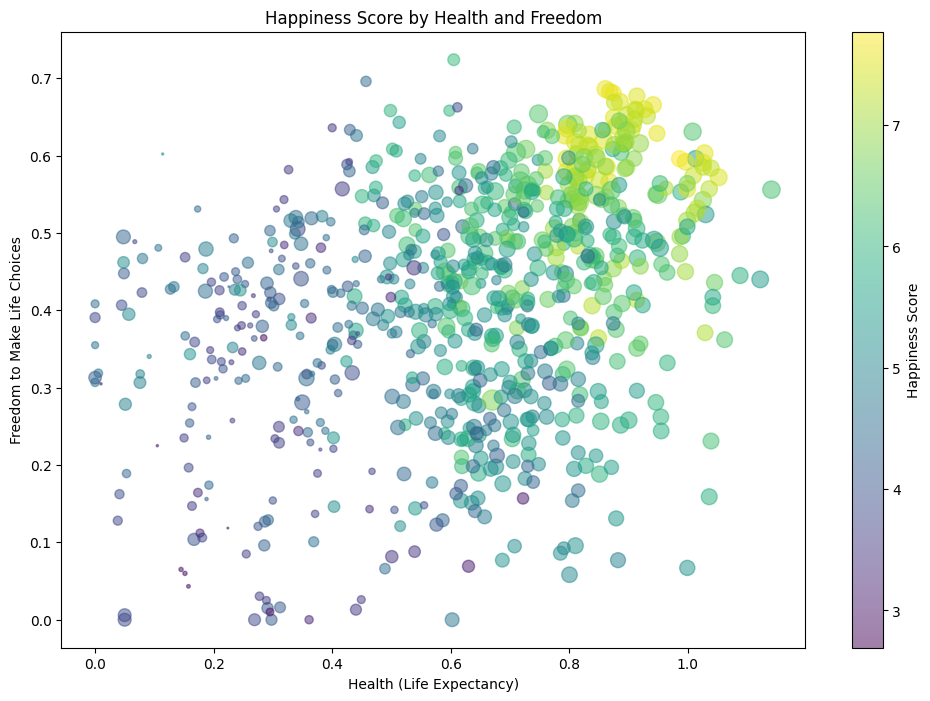

In [8]:
plt.figure(figsize=(12, 8))

plt.scatter(df_all_years['Health'], df_all_years['Freedom'], s=df_all_years['Economy']*100, alpha=0.5, c=df_all_years['Score'], cmap="viridis")
plt.colorbar(label='Happiness Score')
plt.title("Happiness Score by Health and Freedom")
plt.xlabel("Health (Life Expectancy)")
plt.ylabel("Freedom to Make Life Choices")
plt.show()


# size of the bubbles -> economy of the vountry

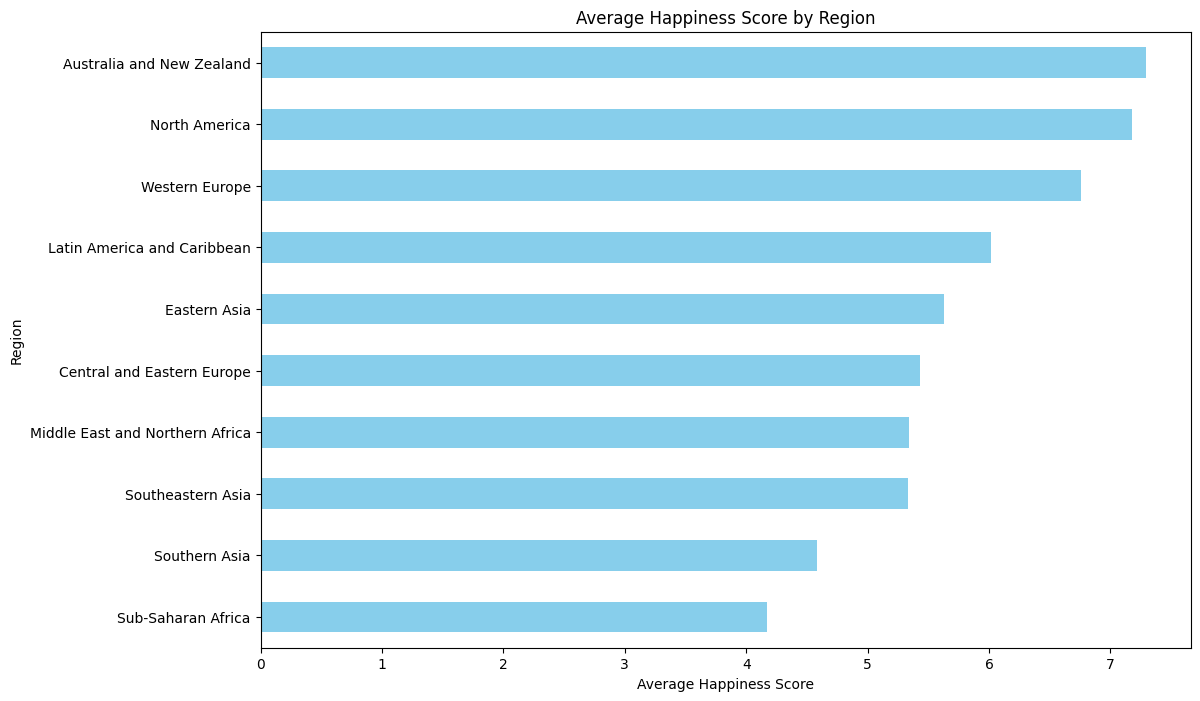

In [9]:
# Merge regional data (if not already merged)
df_all_years_with_region = df_all_years.merge(country_regions_df, on="Country", how="left")

# Calculate average happiness by region
region_avg_score = df_all_years_with_region.groupby("Region")["Score"].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
region_avg_score.plot(kind='barh', color='skyblue')
plt.title("Average Happiness Score by Region")
plt.xlabel("Average Happiness Score")
plt.show()

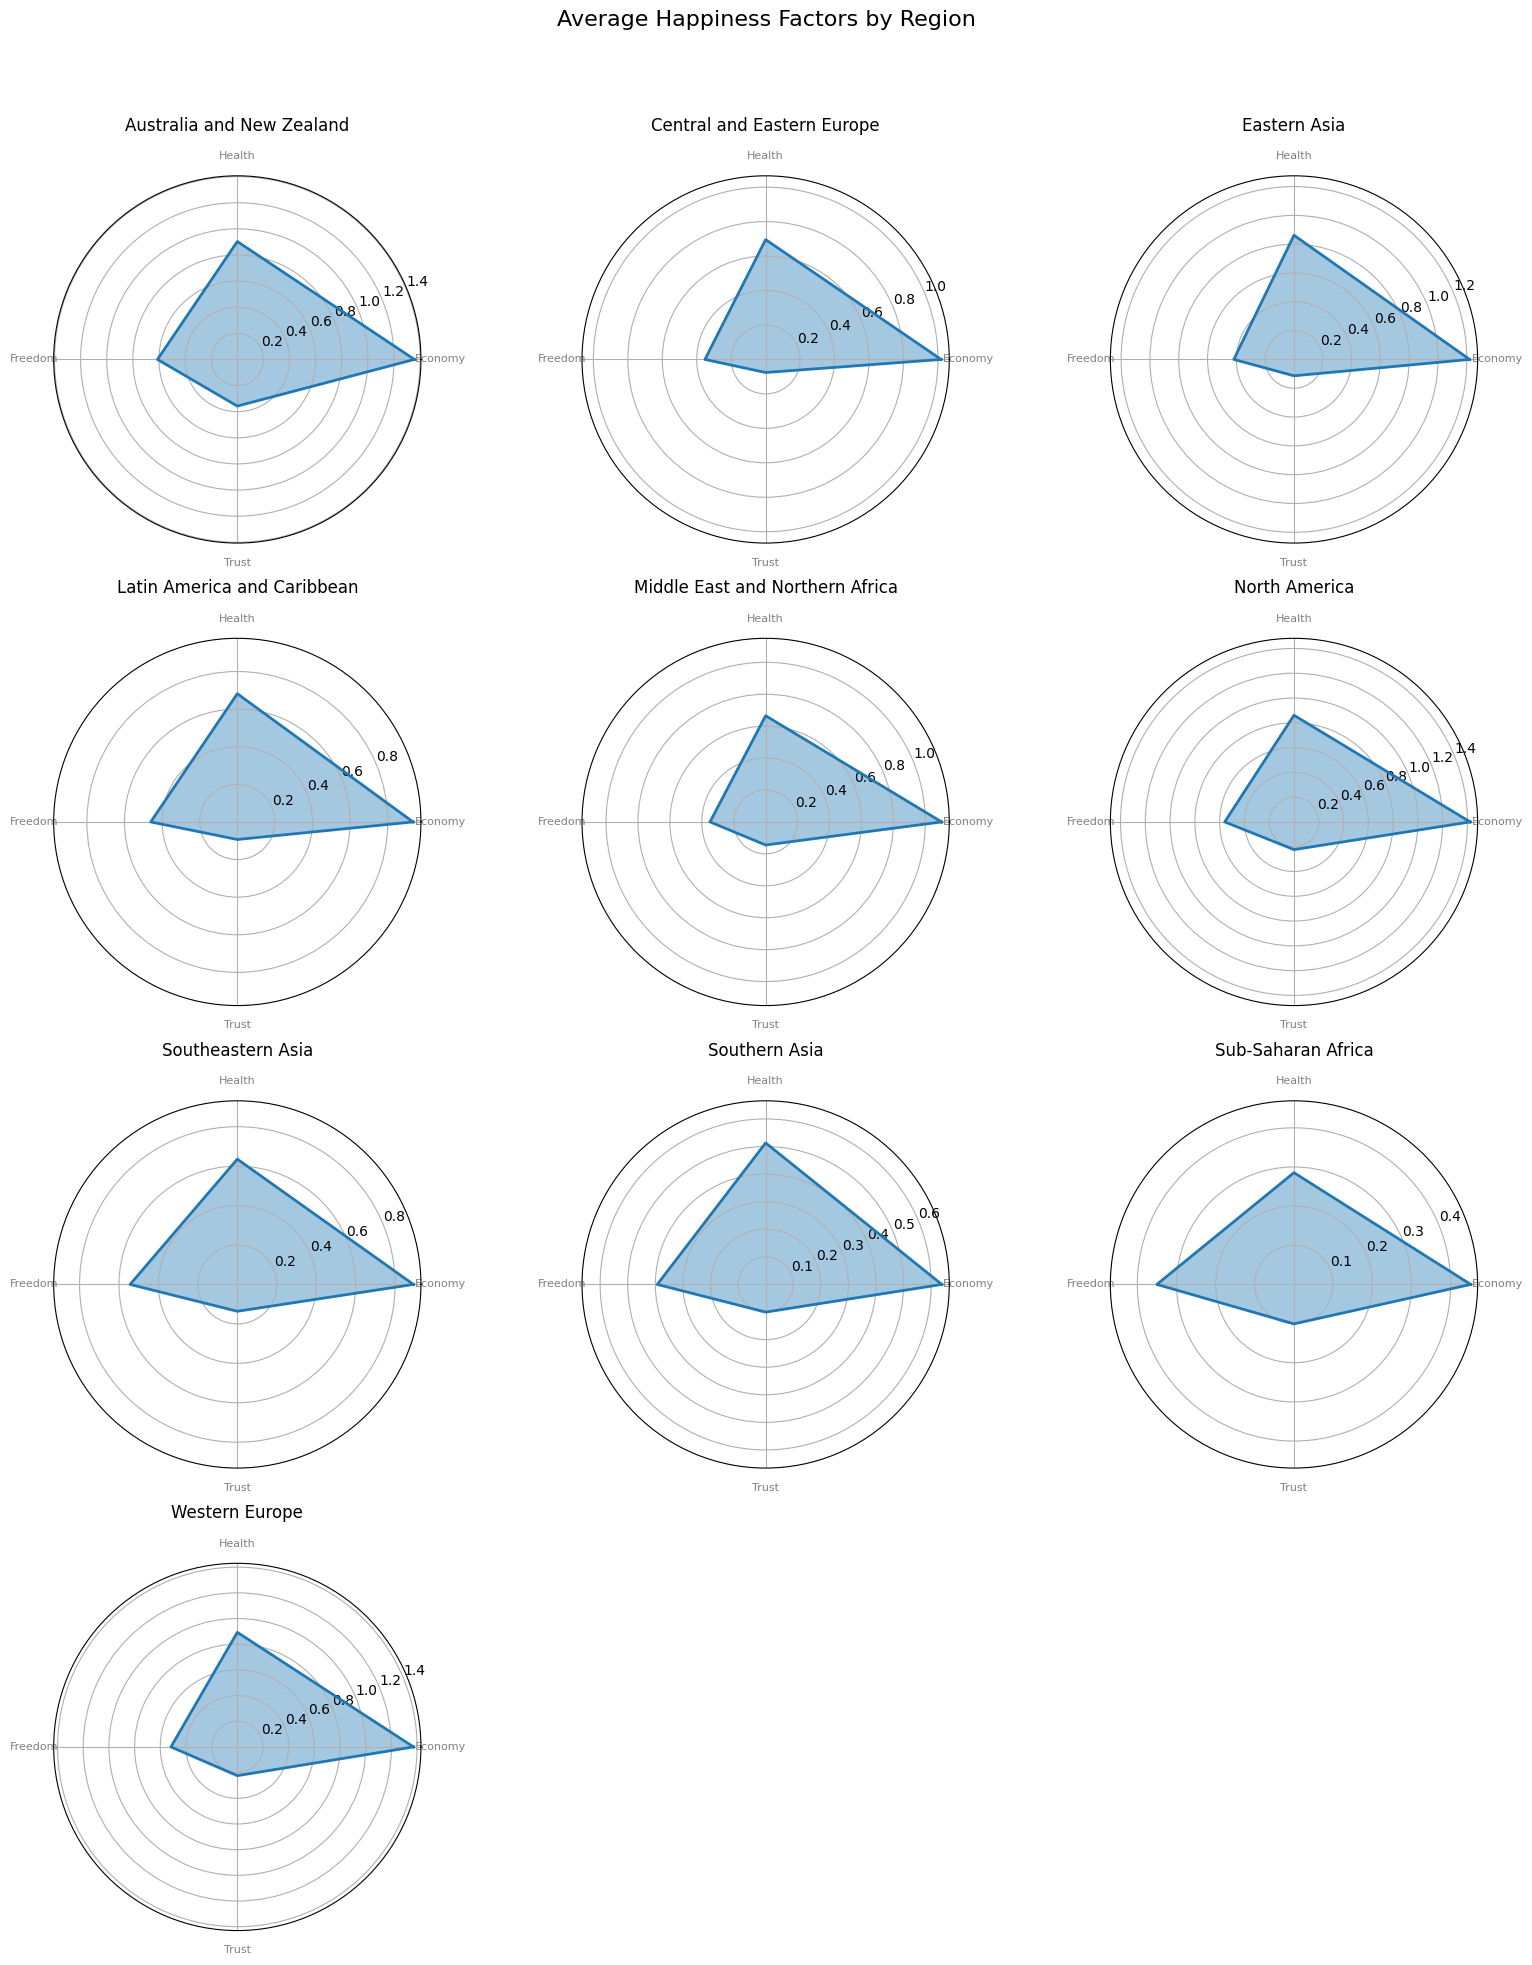

In [11]:
# Merge regional data with the main dataset (if not already done)
df_all_years_with_region = df_all_years.merge(country_regions_df[['Country', 'Region']], on="Country", how="left")

# Calculate average values by region for key factors
region_avg = df_all_years_with_region.groupby("Region")[['Economy', 'Health', 'Freedom', 'Trust']].mean()

# Radar chart setup
categories = list(region_avg.columns)
N = len(categories)

# Define the angle of each axis on the radar chart
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Complete the circle

# Determine the grid size
num_regions = len(region_avg)
cols = 3  # Number of columns
rows = (num_regions // cols) + (num_regions % cols > 0)  # Calculate rows needed

# Initialize the radar chart
plt.figure(figsize=(16, rows * 5))  # Adjust figure size based on number of rows

# Plot each region's radar chart
for i, region in enumerate(region_avg.index):
    values = region_avg.loc[region].tolist()
    values += values[:1]  # Complete the circle to close the radar chart

    # Create a subplot for each region
    ax = plt.subplot(rows, cols, i + 1, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    
    # Plot the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=region)
    ax.fill(angles, values, alpha=0.4)

    # Set the title for each subplot to the region name
    plt.title(region, size=12, color='black', y=1.1)

plt.suptitle("Average Happiness Factors by Region", size=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the main title
plt.show()